<a href="https://colab.research.google.com/github/nicolas0liveira/algamoney-api/blob/master/COVID19_Analisando_dados_com_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Séries Temporais
##Analisando dados com o Prophet - API para predição do facebook

https://facebook.github.io/prophet/docs/quick_start.html



In [0]:
import pandas as pd
import numpy as np

from fbprophet import Prophet

# Fonte de dados: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
# https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/covid_19_data.csv

In [3]:
covid = pd.read_csv('https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/covid_19_data.csv')
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
7009,7010,03/19/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7010,7011,03/19/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7011,7012,03/19/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7012,7013,03/19/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7013,7014,03/19/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


In [0]:
covid.rename(columns={'ObservationDate':'Date','Country/Region':'Country'}, inplace=True)

In [15]:
covid.tail()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
7009,7010,03/19/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7010,7011,03/19/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7011,7012,03/19/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7012,7013,03/19/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7013,7014,03/19/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


# AGRUPANDO POR DATA

In [16]:
mortes = covid.groupby('Date').sum()['Deaths'].reset_index()
mortes.tail()

,Date,Deaths
53,03/15/2020,6440.0
54,03/16/2020,7126.0
55,03/17/2020,7905.0
56,03/18/2020,8733.0
57,03/19/2020,9867.0


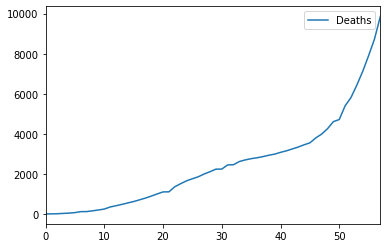

In [17]:
mortes.plot()

In [18]:
type(mortes)

pandas.core.frame.DataFrame

In [20]:
# O Prohphet espera que o dataframe possua duas colunas com os seguintes nomes: 
# ds, no formato YYYY-MM-DD e y, valor numérico que desejamos prever

#mudar o nome das colunas para ds e y
mortes.columns = ['ds','y']
mortes.tail()

,ds,y
53,03/15/2020,6440.0
54,03/16/2020,7126.0
55,03/17/2020,7905.0
56,03/18/2020,8733.0
57,03/19/2020,9867.0


In [21]:
#colocar a data no formato YYYY-MM-DD
mortes['ds'] = pd.to_datetime(mortes['ds'])
mortes.tail()

,ds,y
53,2020-03-15,6440.0
54,2020-03-16,7126.0
55,2020-03-17,7905.0
56,2020-03-18,8733.0
57,2020-03-19,9867.0


## Previsão de Mortes da COVID-19 no mundo

vamos realizar uma previsão de uma semana (periods=7 #dias), com intervalo de confiança de 95%.

### Confiança
Nas séries temporais a tendencia muda o tempo todo. Isso é histórico. Por isso é a coisa mais razoável possível é assumirmos que o futuro sofrerá mudanças de tendência.

Nesse caso, assumuremos um intervalo de confiana de 95%, ou seja, admitimos um erro de 5%

In [0]:
dias = 30

In [39]:
m = Prophet(interval_width=0.95)
m.fit(mortes)
futuro = m.make_future_dataframe(periods=dias)
futuro.tail(dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
58,2020-03-20
59,2020-03-21
60,2020-03-22
61,2020-03-23
62,2020-03-24
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29


In [40]:
previsao = m.predict(futuro)
previsao.tail(dias)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
58,2020-03-20,8754.692977,8118.293964,9282.570896,8741.559501,8768.645583,-46.352308,-46.352308,-46.352308,-46.352308,-46.352308,-46.352308,0.0,0.0,0.0,8708.340669
59,2020-03-21,9157.418961,8528.830219,9718.409196,9112.333264,9195.258847,-37.721156,-37.721156,-37.721156,-37.721156,-37.721156,-37.721156,0.0,0.0,0.0,9119.697805
60,2020-03-22,9560.144945,8908.962670,10100.619255,9466.425902,9630.508016,-46.535627,-46.535627,-46.535627,-46.535627,-46.535627,-46.535627,0.0,0.0,0.0,9513.609318
61,2020-03-23,9962.870929,9284.162734,10532.896933,9830.272947,10069.980188,-34.120435,-34.120435,-34.120435,-34.120435,-34.120435,-34.120435,0.0,0.0,0.0,9928.750494
62,2020-03-24,10365.596913,9705.219057,10977.966774,10183.359686,10509.173341,-5.455514,-5.455514,-5.455514,-5.455514,-5.455514,-5.455514,0.0,0.0,0.0,10360.141398
63,2020-03-25,10768.322897,10200.466180,11435.335755,10543.904687,10966.620157,59.363347,59.363347,59.363347,59.363347,59.363347,59.363347,0.0,0.0,0.0,10827.686244
64,2020-03-26,11171.048881,10611.575009,11974.520858,10896.278965,11417.701958,110.821693,110.821693,110.821693,110.821693,110.821693,110.821693,0.0,0.0,0.0,11281.870574
65,2020-03-27,11573.774865,10847.006054,12215.302668,11249.155525,11876.544966,-46.352308,-46.352308,-46.352308,-46.352308,-46.352308,-46.352308,0.0,0.0,0.0,11527.422557
66,2020-03-28,11976.500848,11190.387389,12613.705399,11591.587458,12349.433096,-37.721156,-37.721156,-37.721156,-37.721156,-37.721156,-37.721156,0.0,0.0,0.0,11938.779692
67,2020-03-29,12379.226832,11609.034051,13030.726550,11928.057537,12817.200887,-46.535627,-46.535627,-46.535627,-46.535627,-46.535627,-46.535627,0.0,0.0,0.0,12332.691206


In [41]:
previsao[['ds','yhat_lower','yhat','yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
58,2020-03-20,8118.293964,8708.340669,9282.570896
59,2020-03-21,8528.830219,9119.697805,9718.409196
60,2020-03-22,8908.962670,9513.609318,10100.619255
61,2020-03-23,9284.162734,9928.750494,10532.896933
62,2020-03-24,9705.219057,10360.141398,10977.966774
63,2020-03-25,10200.466180,10827.686244,11435.335755
64,2020-03-26,10611.575009,11281.870574,11974.520858
65,2020-03-27,10847.006054,11527.422557,12215.302668
66,2020-03-28,11190.387389,11938.779692,12613.705399
67,2020-03-29,11609.034051,12332.691206,13030.726550


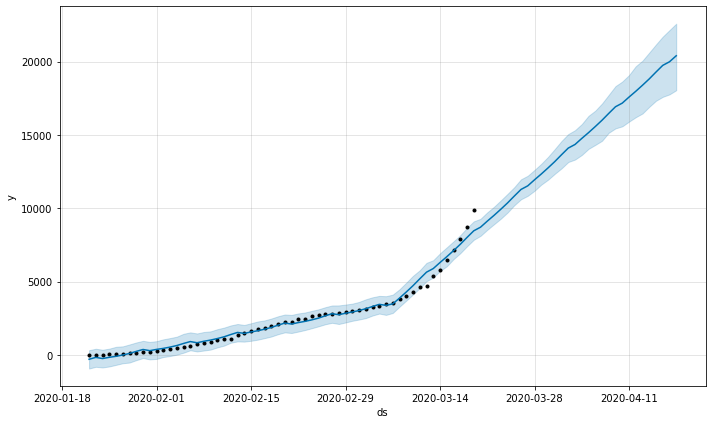

In [42]:
confirmed_forecast_plot = m.plot(previsao)